In [1]:
"""
bordes.py
Valeria Castañon
Omar Flores
04 - abril - 2023
Programa que aplica el filtro de sobel(x,y), laplaciano 2 para la deteccion de bordes 
 y un perfilado
"""

'\nbordes.py\nValeria Castañon\nOmar Flores\n04 - abril - 2023\nPrograma que aplica el filtro de sobel(x,y), laplaciano 2 para la deteccion de bordes \n y un perfilado\n'

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math 

[[170 170 171 ... 127 127 128]
 [169 169 171 ... 125 125 125]
 [169 170 171 ... 125 124 124]
 ...
 [106 106 106 ...  81  81  84]
 [106 107 107 ...  82  83  84]
 [106 107 107 ...  82  82  82]]


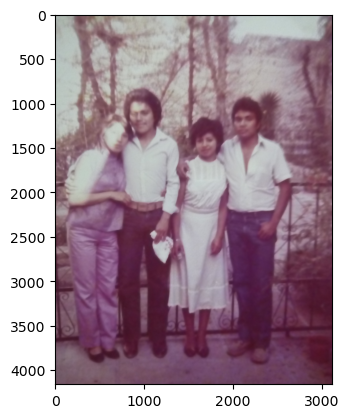

In [3]:
#---------- obtener imagen  sus datos ---------- 
img = Image.open("mama.jpg")  #lee la imagen
matriz = np.array(img)  #convierte la imagen en un arreglo
filas,columnas,dimensiones = matriz.shape # filas, columnas y dimensiones de la matriz
plt.imshow(img)

#separa la imagen en sus 3 colores rgb
r, g, b = img.split()

#obtiene la matriz de colores
matriz_rojo = np.array(r)
matriz_verde = np.array(g)
matriz_azul = np.array(b)

print(matriz_rojo)

In [4]:
laplaciano = np.array([[-1,-1,-1],
                      [-1,8,-1],
                      [-1,-1,-1]])

sobel_x = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])

sobel_y = np.array([[-1,-2,-1],
                    [0,0,0],
                    [1,2,1]])

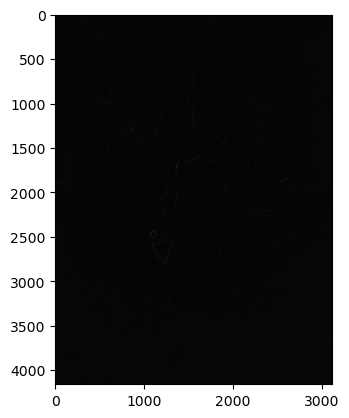

In [5]:
#--------- se realiza la convolucion de las matrices ----------
lap_r = np.zeros((filas, columnas))
lap_g = np.zeros((filas, columnas))
lap_b = np.zeros((filas, columnas))

for x in range(filas):
    for y in range(columnas):
        for x2 in range(3):
            for y2 in range(3):
                if(x>1 and x<filas-1 and y>1 and y<columnas-1):
                    lap_r[x,y] += (laplaciano[x2,y2] * matriz_rojo[x-1+x2,y-1+y2])
                    lap_g[x,y] += (laplaciano[x2,y2] * matriz_verde[x-1+x2,y-1+y2])
                    lap_b[x,y] += (laplaciano[x2,y2] * matriz_azul[x-1+x2,y-1+y2])
                 

img_lap = Image.fromarray(lap_r+lap_g+lap_b)
plt.imshow(img_lap)


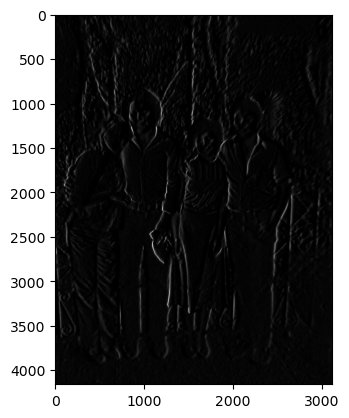

In [6]:
#--------- se realiza la convolucion de las matrices ----------
sobx_r = np.zeros((filas, columnas))
sobx_g = np.zeros((filas, columnas))
sobx_b = np.zeros((filas, columnas))

for x in range(filas):
    for y in range(columnas):
        for x2 in range(3):
            for y2 in range(3):
                if(x>1 and x<filas-1 and y>1 and y<columnas-1):
                    sobx_r[x,y] += (sobel_x[x2,y2] * matriz_rojo[x-1+x2,y-1+y2])
                    sobx_g[x,y] += (sobel_x[x2,y2] * matriz_verde[x-1+x2,y-1+y2])
                    sobx_b[x,y] += (sobel_x[x2,y2] * matriz_azul[x-1+x2,y-1+y2])

img_sx = Image.fromarray(sobx_r+sobx_g+sobx_b)
plt.imshow(img_sx)

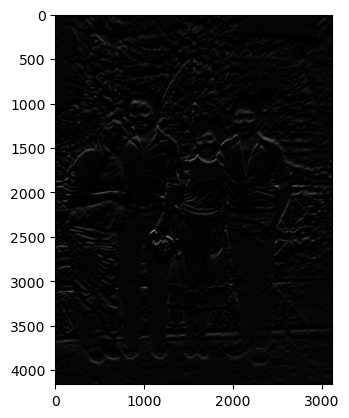

In [7]:
#--------- se realiza la convolucion de las matrices ----------
soby_r = np.zeros((filas, columnas))
soby_g = np.zeros((filas, columnas))
soby_b = np.zeros((filas, columnas))


for x in range(filas):
    for y in range(columnas):
        for x2 in range(3):
            for y2 in range(3):
                if(x>1 and x<filas-1 and y>1 and y<columnas-1):
                    soby_r[x,y] += (sobel_y[x2,y2] * matriz_rojo[x-1+x2,y-1+y2])
                    soby_g[x,y] += (sobel_y[x2,y2] * matriz_verde[x-1+x2,y-1+y2])
                    soby_b[x,y] += (sobel_y[x2,y2] * matriz_azul[x-1+x2,y-1+y2])

img_sy = Image.fromarray(soby_r+soby_g+soby_b)
plt.imshow(img_sy)

Imagen lista


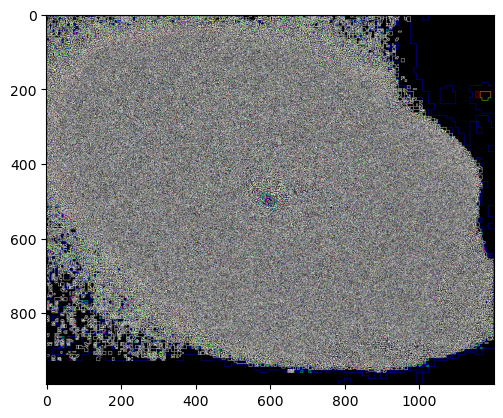

In [7]:
#---------- combinaicon de imagenes para laplace ---------

# matriz que contiene la nueva imagen 
union_lap = np.zeros((filas,columnas,3), dtype=np.uint8)
        
# Asigna valores a cada canal de color
union_lap[:,:,0] = lap_r  # valores de rojo
union_lap[:,:,1] = lap_g  # valores de verde
union_lap[:,:,2] = lap_b  # valores de azul

# Crea una imagen RGB desde la matriz tridimensional
imagen_lap = Image.fromarray(union_lap)

# Guarda la imagen en un archivo
imagen_lap.save("laplaciano.png")
print("Imagen lista")
plt.imshow(imagen_lap)


Imagen lista


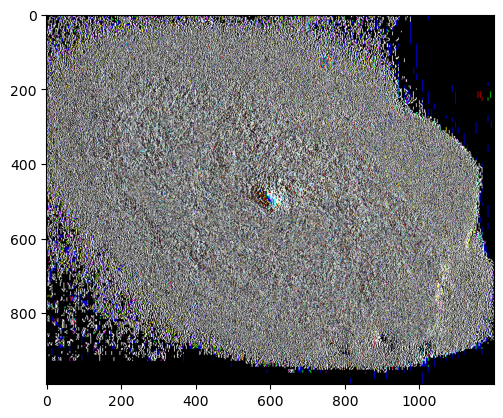

In [8]:
#---------- combinaicon de imagenes para sobel en x ---------

# matriz que contiene la nueva imagen 
union_sobx = np.zeros((filas,columnas,3), dtype=np.uint8)
        
# Asigna valores a cada canal de color
union_sobx[:,:,0] = sobx_r  # valores de rojo
union_sobx[:,:,1] = sobx_g  # valores de verde
union_sobx[:,:,2] = sobx_b  # valores de azul

# Crea una imagen RGB desde la matriz tridimensional
imagen_sobx = Image.fromarray(union_sobx)

# Guarda la imagen en un archivo
imagen_sobx.save("sobelx.png")
print("Imagen lista")
plt.imshow(imagen_sobx)


Imagen lista


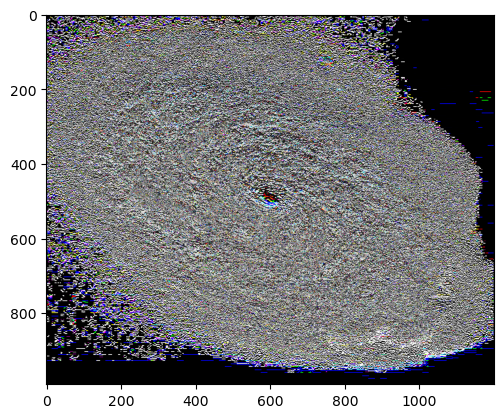

In [9]:
#---------- combinaicon de imagenes para sobel en y ---------

# matriz que contiene la nueva imagen 
union_soby = np.zeros((filas,columnas,3), dtype=np.uint8)
        
# Asigna valores a cada canal de color
union_soby[:,:,0] = soby_r  # valores de rojo
union_soby[:,:,1] = soby_g  # valores de verde
union_soby[:,:,2] = soby_b  # valores de azul

# Crea una imagen RGB desde la matriz tridimensional
imagen_soby = Image.fromarray(union_soby)

# Guarda la imagen en un archivo
imagen_soby.save("sobely.png")
print("Imagen lista")
plt.imshow(imagen_soby)

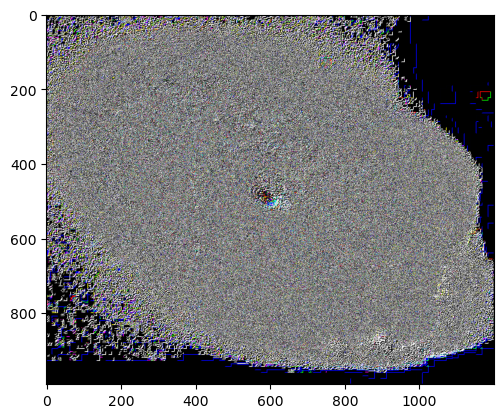

In [10]:
#--------- suma de las imagenes --------
union_final = union_lap + union_sobx + union_soby
imagen_final = Image.fromarray(union_final)
plt.imshow(imagen_final)

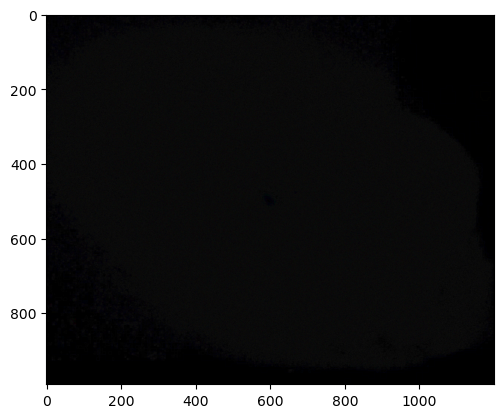

In [11]:
gradiante = np.sqrt(np.sqrt(union_sobx) + np.sqrt(union_soby))
imagen_final2 = Image.fromarray(gradiante.astype(np.uint8))
plt.imshow(imagen_final2)